**UNIT - Curso de Computação**

**Processamento de Imagens de Computação Gráfica**

Profª. Layse Santos Souza



#**Fundamentos de Imagens Digitais**

 

*   Resolução espacial



In [1]:
import numpy as np
import scipy.misc
from skimage.transform import resize
from skimage import data
from skimage import io
from PIL import Image
import cv2 as cv 
import matplotlib.pylab as plt
import random

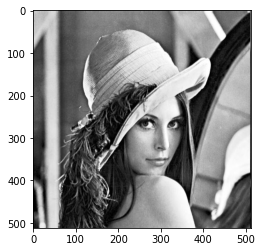

In [2]:
image = cv.imread("/content/sample_data/lena.jpg")
plt.imshow(image)
plt.show()

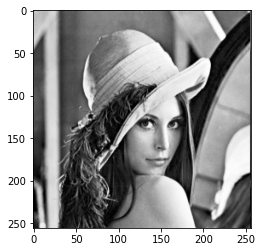

In [13]:
new_img1 = resize(image, (256, 256))
plt.imshow(new_img1)
plt.show()

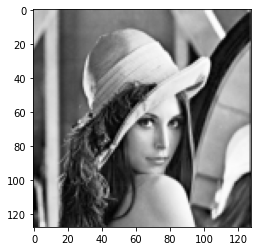

In [14]:
new_img2 = resize(image, (128, 128))
plt.imshow(new_img2)
plt.show()

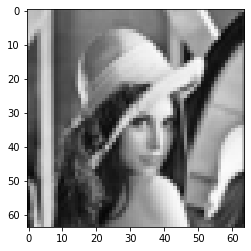

In [15]:
new_img3 = resize(image, (64, 64))
plt.imshow(new_img3)
plt.show()

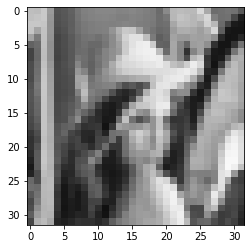

In [16]:
new_img4 = resize(image, (32, 32))
plt.imshow(new_img4)
plt.show()

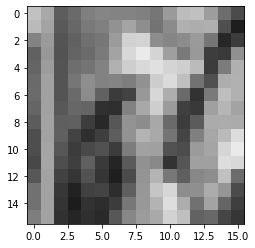

In [17]:
new_img5 = resize(image, (16, 16))
plt.imshow(new_img5)
plt.show()

 

*   Vizinhança



In [21]:
#Método para imprimir a vizinhança 4 de um determinado pixel

def vizinhanca4(linha, coluna):
    v1 = (linha - 1, coluna)
    v2 = (linha, coluna - 1)
    v3 = (linha + 1, coluna)
    v4 = (linha, coluna + 1)
    return [v1, v2, v3, v4]


In [22]:
#Método para imprimir a vizinhança 8 de um determinado pixel

def vizinhanca8(linha, coluna):
    v5 = (linha - 1, coluna - 1)
    v6 = (linha - 1, coluna + 1)
    v7 = (linha + 1, coluna - 1)
    v8 = (linha + 1, coluna + 1)
    
    vizinhanca = vizinhanca4(linha, coluna) + [v5, v6, v7, v8]
    return vizinhanca

In [24]:
print(image)

[[[128 128 128]
  [135 135 135]
  [131 131 131]
  ...
  [147 147 147]
  [  0   0   0]
  [103 103 103]]

 [[182 182 182]
  [188 188 188]
  [182 182 182]
  ...
  [177 177 177]
  [ 10  10  10]
  [184 184 184]]

 [[201 201 201]
  [205 205 205]
  [197 197 197]
  ...
  [179 179 179]
  [  0   0   0]
  [203 203 203]]

 ...

 [[ 12  12  12]
  [ 20  20  20]
  [ 21  21  21]
  ...
  [ 76  76  76]
  [  3   3   3]
  [ 14  14  14]]

 [[ 10  10  10]
  [ 21  21  21]
  [ 24  24  24]
  ...
  [ 82  82  82]
  [  6   6   6]
  [  7   7   7]]

 [[  9   9   9]
  [ 22  22  22]
  [ 27  27  27]
  ...
  [ 85  85  85]
  [  7   7   7]
  [  3   3   3]]]


In [27]:
vizinhanca4(1, 1)

[(0, 1), (1, 0), (2, 1), (1, 2)]

In [26]:
vizinhanca8(1,1)

[(0, 1), (1, 0), (2, 1), (1, 2), (0, 0), (0, 2), (2, 0), (2, 2)]

* Corte da imagem

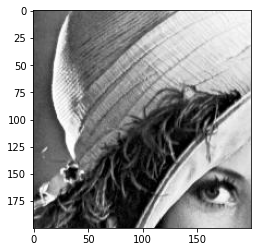

In [34]:
origem = (100, 100)
delta = 200

new_image = image[origem[0]:(origem[0]+delta),origem[1]:(origem[1]+delta)]

plt.imshow(new_image, cmap="gray")
plt.show()

* Criando ruído na imagem

In [3]:
temp_image = np.asarray(image)

In [4]:
tamanho_imagem = image.shape

M = tamanho_imagem[0]
N = tamanho_imagem[1]

new_image = np.zeros((M, N),dtype='uint8')

for i in range(0, M):
    
    randomvalues = random.sample(range(0, N), 40)
    
    for value in randomvalues:
        
        temp_image[i, value] = 0

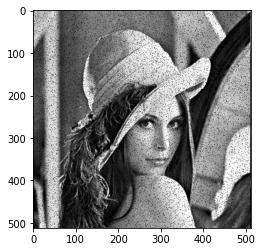

In [5]:
plt.imshow(temp_image, cmap="gray")
plt.show()

* Retirando o ruído da imagem

In [9]:
# Aplicando o filtro de mediana da biblioteca OpenCV atribuindo a variavel median utilizando uma mascara 5x5
median = cv.medianBlur(temp_image,5)

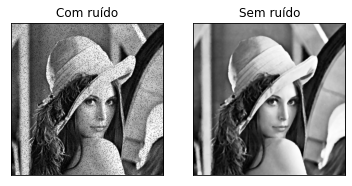

In [11]:
# Código reponsável por plotar a imagem original e o resultado lado a lado a nível de comparacao

plt.subplot(121),plt.imshow(temp_image),plt.title('Com ruído')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(median),plt.title('Sem ruído')
plt.xticks([]), plt.yticks([])


plt.show()